$$\frac{dy}{dx} = \frac{1}{2} y$$

Initial conditions: $y(0) = 1$

## Imports

In [2]:
import sympy as sp

In [3]:
x = sp.symbols('x')
y = sp.Function('y')(x)

In [4]:
sp.init_printing()

## Building the equation

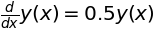

In [5]:
equation = sp.Eq(sp.diff(y, x), 1/2 * y)
equation

## Solving the equation

In [6]:
ysol = sp.dsolve(equation, y)
ysol

## Applying Boundary/Initial Conditions

In [7]:
ysol.subs(y,1).subs(x,0)

In [8]:
ysol.atoms()

In [12]:
C1 = sp.symbols('C1')

In [20]:
constant = sp.solve(ysol, C1)[0].subs({y:1, x:0})
ysol.subs(C1, constant)

In [49]:
ysol.subs(C1, constant).rhs

## Comparison with numerical solutions

In [21]:
import numpy as np
from scipy.integrate import odeint

In [22]:
def rhs(y, x):
    return 0.5*y

In [23]:
domain = np.linspace(0,1, 100)
y0 = 1
nsol = odeint(rhs, y0, domain)


In [24]:
nsol

array([[ 1.        ],
       [ 1.00506329],
       [ 1.0101522 ],
       [ 1.01526691],
       [ 1.02040748],
       [ 1.02557407],
       [ 1.03076682],
       [ 1.03598589],
       [ 1.04123137],
       [ 1.04650342],
       [ 1.05180216],
       [ 1.05712773],
       [ 1.06248027],
       [ 1.0678599 ],
       [ 1.07326678],
       [ 1.07870103],
       [ 1.0841628 ],
       [ 1.08965222],
       [ 1.09516943],
       [ 1.10071458],
       [ 1.10628781],
       [ 1.11188925],
       [ 1.11751906],
       [ 1.12317737],
       [ 1.12886433],
       [ 1.13458009],
       [ 1.14032478],
       [ 1.14609857],
       [ 1.15190158],
       [ 1.15773399],
       [ 1.16359592],
       [ 1.16948753],
       [ 1.17540897],
       [ 1.1813604 ],
       [ 1.18734196],
       [ 1.1933538 ],
       [ 1.19939609],
       [ 1.20546897],
       [ 1.21157259],
       [ 1.21770713],
       [ 1.22387272],
       [ 1.23006953],
       [ 1.23629772],
       [ 1.24255744],
       [ 1.24884886],
       [ 1

In [25]:
def analytic_1(x):
    return np.exp(x/2)

In [45]:
help(sp.lambdify)

Help on function lambdify in module sympy.utilities.lambdify:

lambdify(args, expr, modules=None, printer=None, use_imps=True, dummify=True)
    Returns a lambda function for fast calculation of numerical values.
    
    If not specified differently by the user, ``modules`` defaults to
    ``["numpy"]`` if NumPy is installed, and ``["math", "mpmath", "sympy"]``
    if it isn't, that is, SymPy functions are replaced as far as possible by
    either ``numpy`` functions if available, and Python's standard library
    ``math``, or ``mpmath`` functions otherwise. To change this behavior, the
    "modules" argument can be used. It accepts:
    
     - the strings "math", "mpmath", "numpy", "numexpr", "sympy", "tensorflow"
     - any modules (e.g. math)
     - dictionaries that map names of sympy functions to arbitrary functions
     - lists that contain a mix of the arguments above, with higher priority
       given to entries appearing first.
    
    .. warning::
        Note that this fu

In [50]:
analytic_2 = sp.lambdify(x, ysol.subs(C1, constant).rhs)

In [26]:
ansol_1 = analytic_1(domain)

In [51]:
ansol_2 = analytic_2(domain)

In [52]:
ansol_1 - ansol_2

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [36]:
residual = ansol_1 - nsol[:,0]
np.sqrt(residual.dot(residual))

## Plotting results

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

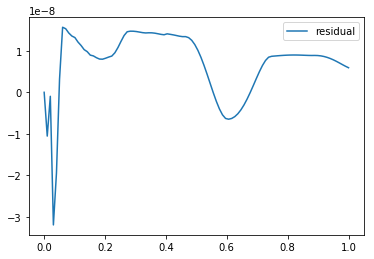

In [43]:
#plt.plot(domain, ansol_1, label="analytic")
#plt.plot(domain, nsol, label="numerical")
plt.plot(domain, residual, label="residual")
plt.legend()

Next one to try:
$$\frac{dy}{dx} = 3x^2 - 2,$$ $0≤ x≤ 1$; initial conditions: $y(0) = 0.5$

In [55]:
x, C1 = sp.symbols('x C1')
y = sp.Function('y')(x)
rhs = 3*x**2 - 2
equation = sp.Eq(sp.diff(y,x), rhs)
ysol = sp.dsolve(equation, y)

In [56]:
ysol

### Apply initial conditions

In [60]:
ysol_with_ic = ysol.subs(C1, sp.solve(ysol.subs({y:0.5, x:0}))[0])
ysol_with_ic